## Observations and Insights 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
df1=mouse_metadata
df2=study_results
# Combine the data into a single dataset
df3=pd.merge(df1, df2, how="left", on=['Mouse ID'])
# Display the data table for preview
df3


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df4=df3[df3.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
df4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
#Dropping the duplicates
df6=df3.drop_duplicates(subset=['Mouse ID','Timepoint'])
df6.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [48]:
# Checking the number of mice in the clean DataFrame.
a=df6['Mouse ID'].nunique()
a

249

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#We want to get the volume of the tumer after 45days and do a summary statistics on that - since the final result is what we are after.


df8=df6.query('Timepoint == 45')
df9=df8.groupby(['Drug Regimen']).describe()
df9

Age_months                                                      \
                  count       mean       std  min    25%   50%    75%   max   
Drug Regimen                                                                  
Capomulin          21.0  12.809524  7.909608  1.0   7.00  16.0  19.00  24.0   
Ceftamin           13.0  13.538462  8.382674  2.0   6.00  15.0  20.00  24.0   
Infubinol           9.0  18.555556  5.592654  8.0  17.00  20.0  23.00  24.0   
Ketapril           11.0  16.272727  5.255300  7.0  14.00  18.0  18.50  24.0   
Naftisol           13.0  12.230769  6.365975  2.0   8.00   9.0  18.00  23.0   
Placebo            11.0  11.818182  6.600275  1.0   8.00  12.0  17.00  21.0   
Propriva            7.0  12.142857  7.515064  4.0   6.00  10.0  18.50  22.0   
Ramicane           20.0  10.050000  5.567528  1.0   7.75   9.0  11.50  21.0   
Stelasyn           11.0  12.727273  9.296138  1.0   3.50  13.0  21.50  23.0   
Zoniferol          14.0  13.071429  5.850237  2.0  10.25  13.5  15.75  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin          21.0  19.857143  ...          40.159220  47.685963   
Ceftamin           13.0  27.615385  ...          67.527482  68.923185   
Infubinol           9.0  26.666667  ...          67.685569  72.226731   
Ketapril           11.0  27.727273  ...          74.002742  78.567014   
Naftisol           13.0  27.153846  ...          73.867845  76.668817   
Placebo            11.0  27.727273  ...          71.486792  73.212939   
Propriva            7.0  27.142857  ...          70.330268  72.455421   
Ramicane           20.0  19.300000  ...          38.508305  45.220869   
Stelasyn           11.0  27.545455  ...          72.572102  75.123690   
Zoniferol          14.0  27.571429  ...          68.341763  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin                21.0  1.476190  0.928388  0.0  1.0  1.0  2.0  3.0  
Ceftamin                 13.0  2.692308  1.031553  1.0  3.0  3.0  3.0  4.0  
Infubinol                 9.0  2.111111  0.927961  1.0  1.0  2.0  3.0  3.0  
Ketapril                 11.0  3.363636  0.924416  2.0  2.5  4.0  4.0  4.0  
Naftisol                 13.0  2.538462  1.265924  1.0  1.0  3.0  4.0  4.0  
Placebo                  11.0  3.272727  1.009050  1.0  3.0  4.0  4.0  4.0  
Propriva                  7.0  2.571429  1.133893  1.0  2.0  2.0  3.5  4.0  
Ramicane                 20.0  1.250000  0.850696  0.0  1.0  1.0  2.0  3.0  
Stelasyn                 11.0  1.727273  1.190874  0.0  1.0  1.0  2.5  4.0  
Zoniferol                14.0  3.071429  1.071612  1.0  2.0  3.5  4.0  4.0  

[10 rows x 40 columns]

In [18]:
df10=df9.drop(['Age_months','Weight (g)','Timepoint','Metastatic Sites'],axis=1)
df10

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                  21.0  36.236114  5.608969  23.343598  32.377357   
Ceftamin                   13.0  64.132421  3.253497  59.741901  61.433892   
Infubinol                   9.0  65.755562  3.433282  60.918767  62.754451   
Ketapril                   11.0  70.662958  4.819674  62.909441  67.129166   
Naftisol                   13.0  69.265506  5.106770  62.670759  63.946640   
Placebo                    11.0  68.084082  4.483167  58.634971  65.955820   
Propriva                    7.0  66.258529  4.996728  58.633404  63.551389   
Ramicane                   20.0  34.955595  5.486439  22.050126  30.981175   
Stelasyn                   11.0  68.438310  5.228845  60.122011  64.053452   
Zoniferol                  14.0  65.960888  3.755037  60.752704  62.618149   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     37.311846  40.159220  47.685963  
Ceftamin      64.299830  67.527482  68.923185  
Infubinol     66.083066  67.685569  72.226731  
Ketapril      69.872251  74.002742  78.567014  
Naftisol      69.563621  73.867845  76.668817  
Placebo       69.042841  71.486792  73.212939  
Propriva      64.957562  70.330268  72.455421  
Ramicane      34.848627  38.508305  45.220869  
Stelasyn      69.299149  72.572102  75.123690  
Zoniferol     65.684689  68.341763  73.324432

## Bar and Pie Charts

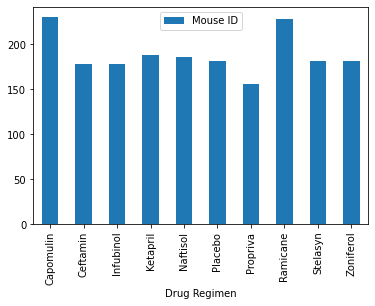

In [49]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

df11=df6.drop(['Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites'],axis=1)
df12=df11.groupby(['Drug Regimen']).count()
bar1=df12.plot.bar()

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
df12


,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


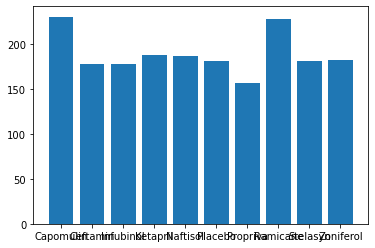

In [50]:
y1=df12['Mouse ID']
x1=df12.index
x1,y1
plt.bar(x1,y1)
plt.show()

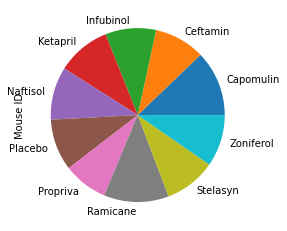

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

x2=df12['Mouse ID'].sum()
x2
y2=df12['Mouse ID']/x2
y2
y2.sum()

pie1=y2.plot.pie()

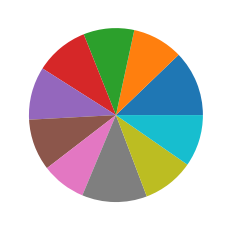

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(y2)
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


df6.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [26]:
df13=df6.drop(['Sex','Age_months','Weight (g)','Metastatic Sites'],axis=1)
df13.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729


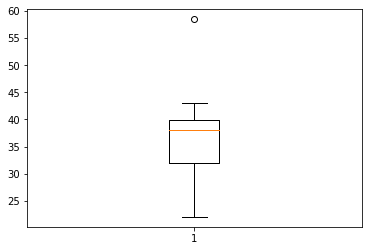

In [27]:
df13.iloc[0,0]
# Capomulin
m1=[]
v1=[]

for i in range(1,1888):
    if df13.iloc[i,1] == 'Capomulin':
        if df13.iloc[i,2]==0:
             m1.append(df13.iloc[i-1,0])
             v1.append(df13.iloc[i-1,3])
        

#print(m1)
df14=pd.DataFrame(v1)
df14.mean()
plt.boxplot(v1)
plt.show()

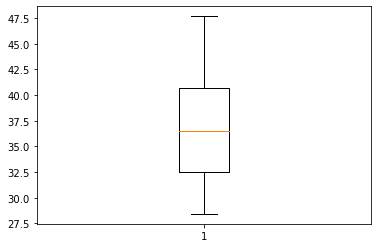

In [51]:
# Ramicane
m2=[]
v2=[]

for i in range(1,1888):
    if df13.iloc[i,1] == 'Ramicane':
        if df13.iloc[i,2]==0:
             m3.append(df13.iloc[i-1,0])
             v2.append(df13.iloc[i-1,3])
        

#print(m1)
df15=pd.DataFrame(v2)
df15.mean()
plt.boxplot(v2)
plt.show()

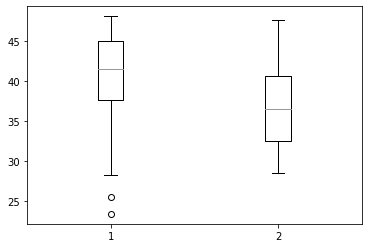

In [52]:
# Capomulin and Ramicane
data=[v1,v2]
plt.boxplot(data)
plt.show()

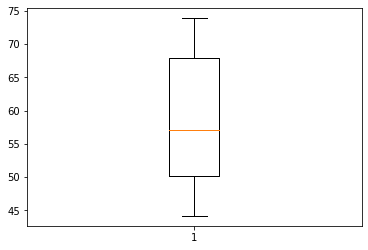

In [53]:
# Infubinol
m3=[]
v3=[]

for i in range(1,1888):
    if df13.iloc[i,1] == 'Infubinol':
        if df13.iloc[i,2]==0:
             m3.append(df13.iloc[i-1,0])
             v3.append(df13.iloc[i-1,3])
        

#print(m3)
df16=pd.DataFrame(v3)
df16.mean()
plt.boxplot(v3)
plt.show()

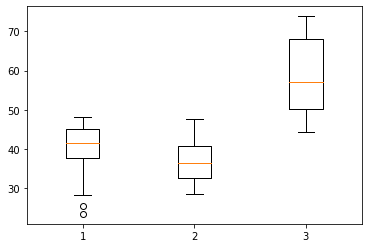

In [54]:
# Capomulin and Ramicane and Infubinol
data=[v1,v2,v3]
plt.boxplot(data)
plt.show()

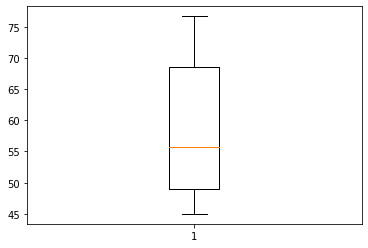

In [55]:
# Ceftamin
m4=[]
v4=[]

for i in range(1,1888):
    if df13.iloc[i,1] == 'Ceftamin':
        if df13.iloc[i,2]==0:
             m4.append(df13.iloc[i-1,0])
             v4.append(df13.iloc[i-1,3])
        

#print(m3)
df17=pd.DataFrame(v4)
df17.mean()
plt.boxplot(v4)
plt.show()

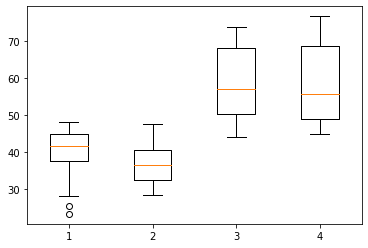

In [56]:
# Capomulin and Ramicane and Infubinol and Ceftamin
data=[v1,v2,v3,v4]
plt.boxplot(data)
plt.show()

In [59]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

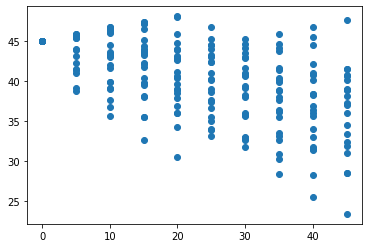

In [61]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Capomulin
m1=[]
v1=[]
time1=[]

for i in range(1,1888):
    if df13.iloc[i,1] == 'Capomulin':
             m1.append(df13.iloc[i,0])
             v1.append(df13.iloc[i,3])
             time1.append(df13.iloc[i,2])
        

#print(m1)
# df14=pd.DataFrame(v1)
# df14.mean()
plt.scatter(time1,v1)
plt.show()

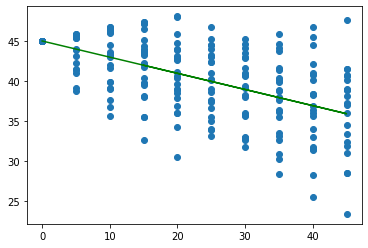

In [62]:
#find line of best fit
a1,b1 = np.polyfit(time1, v1, 1)
x2=[]
y2=[]
for x1 in time1:
    y1=a1*x1+b1
    x2.append(x1)
    y2.append(y1)
    
#add points to plot
#plt.scatter(time1, v1)
plt.plot(x2,y2,color='green')
plt.scatter(time1,v1)
plt.show()
#add line of best fit to plot

In [63]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df6


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [64]:
df18=df6.drop(['Mouse ID','Sex','Age_months','Metastatic Sites'],axis=1)
df18

,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
0,Ramicane,16,0,45.000000
1,Ramicane,16,5,38.825898
2,Ramicane,16,10,35.014271
3,Ramicane,16,15,34.223992
4,Ramicane,16,20,32.997729
...,...,...,...,...
1888,Naftisol,30,25,63.145652
1889,Naftisol,30,30,65.841013
1890,Naftisol,30,35,69.176246
1891,Naftisol,30,40,70.314904


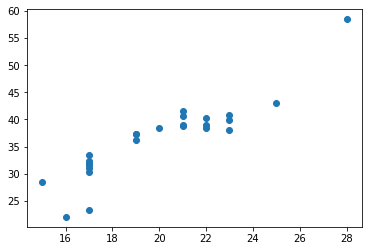

In [65]:
# Capomulin
w1=[]
v5=[]

for i in range(1,1888):
    if df18.iloc[i,0] == 'Capomulin':
        if df18.iloc[i,2]==0:
             w1.append(df18.iloc[i-1,1])
             v5.append(df18.iloc[i-1,3])
        



plt.scatter(w1,v5)
plt.show()

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [67]:
r = np.corrcoef(w1, v5)
r[0,1]

0.9013352256068162

In [68]:
a2,b2 = np.polyfit(w1, v5, 1)


In [69]:
a2,b2

(2.0388897703448285, -4.248410284482773)

In [70]:
#y3=a2*x3+b2 is the linear regression model for weight and tumer volume